In [57]:
# Necessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

%matplotlib inline

#sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [4]:
df = pd.read_csv('final_df.csv')

In [6]:
df

,Unnamed: 0,id,Title,Domestic_Gross,Foreign_Gross,domestic_opening_gross,rating,foreign_market_count,distributor,director,...,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy
0,269,803096,Warcraft,"$47,365,290","$391,683,624","$24,166,110",PG-13,66,Universal Pictures,Duncan Jones,...,0,0,0,0,1,0,0,1,0,0
1,762,1473832,Bridget Jones's Baby,"$24,252,420","$187,700,000","$8,571,785",R,61,Universal Pictures,Sharon Maguire,...,0,0,0,0,1,0,0,0,0,1
2,403,1293847,xXx: Return of Xander Cage,"$44,898,413","$301,219,864","$20,130,142",PG-13,55,Paramount Pictures,D.J. Caruso,...,0,1,0,0,0,0,0,1,0,0
3,420,2034800,The Great Wall,"$45,540,830","$289,393,001","$18,469,620",PG-13,64,Universal Pictures,Yimou Zhang,...,0,0,0,0,1,0,0,1,0,0
4,674,453451,Mr. Bean's Holiday,"$33,302,167","$198,923,741","$9,889,780",G,68,Universal Pictures,Steve Bendelack,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,469,878804,The Blind Side,"$255,959,475","$53,248,834","$34,119,372",PG-13,33,Warner Bros.,John Lee Hancock,...,0,0,0,0,0,0,1,0,0,0
844,1092,1408253,Ride Along,"$134,938,200","$19,530,702","$41,516,170",PG-13,19,Universal Pictures,Tim Story,...,0,0,0,0,1,0,0,1,0,0
845,822,1649419,The Impossible,"$19,019,882","$179,067,330","$143,818",PG-13,47,Lionsgate,J.A. Bayona,...,0,0,0,0,0,0,0,0,0,0
846,1021,415306,Talladega Nights: The Ballad of Ricky Bobby,"$148,213,377","$15,148,718","$47,042,215",PG-13,39,Sony Pictures Entertainment (SPE),Adam McKay,...,0,1,1,0,0,0,0,0,0,1


In [7]:
#delete old index
del df['Unnamed: 0']

In [198]:
df

,id,Title,Domestic_Gross,Foreign_Gross,domestic_opening_gross,rating,foreign_market_count,distributor,director,actor_1,...,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy
0,803096,Warcraft,47365290,391683624,24166110,PG-13,66,Universal Pictures,Duncan Jones,Travis Fimmel,...,0,0,0,0,1,0,0,1,0,0
1,1473832,Bridget Jones's Baby,24252420,187700000,8571785,R,61,Universal Pictures,Sharon Maguire,Renée Zellweger,...,0,0,0,0,1,0,0,0,0,1
2,1293847,xXx: Return of Xander Cage,44898413,301219864,20130142,PG-13,55,Paramount Pictures,D.J. Caruso,Vin Diesel,...,0,1,0,0,0,0,0,1,0,0
3,2034800,The Great Wall,45540830,289393001,18469620,PG-13,64,Universal Pictures,Yimou Zhang,Matt Damon,...,0,0,0,0,1,0,0,1,0,0
4,453451,Mr. Bean's Holiday,33302167,198923741,9889780,G,68,Universal Pictures,Steve Bendelack,Rowan Atkinson,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,398165,The Longest Yard,158119460,33347096,47606480,PG-13,52,Paramount Pictures,Peter Segal,Adam Sandler,...,0,0,0,0,0,0,0,0,0,1
843,878804,The Blind Side,255959475,53248834,34119372,PG-13,33,Warner Bros.,John Lee Hancock,Quinton Aaron,...,0,0,0,0,0,0,1,0,0,0
844,1408253,Ride Along,134938200,19530702,41516170,PG-13,19,Universal Pictures,Tim Story,Ice Cube,...,0,0,0,0,1,0,0,1,0,0
845,1649419,The Impossible,19019882,179067330,143818,PG-13,47,Lionsgate,J.A. Bayona,Naomi Watts,...,0,0,0,0,0,0,0,0,0,0


In [201]:
df['Domestic_Gross'] = df['Domestic_Gross'].apply(lambda x: x.strip('$').replace(',', "")).astype(int)



In [202]:
df['Foreign_Gross'] = df['Foreign_Gross'].apply(lambda x: x.strip('$').replace(',', "")).astype(int)



In [27]:
df['domestic_opening_gross'] = df['domestic_opening_gross'].apply(lambda x: x.strip('$').replace(',', "")).astype(int)


In [35]:
df['rating'] = df['rating'].astype(str)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   848 non-null    int64 
 1   Title                                848 non-null    object
 2   Domestic_Gross                       848 non-null    int64 
 3   Foreign_Gross                        848 non-null    int64 
 4   domestic_opening_gross               848 non-null    int64 
 5   rating                               848 non-null    object
 6   foreign_market_count                 848 non-null    int64 
 7   distributor                          848 non-null    object
 8   director                             848 non-null    object
 9   actor_1                              848 non-null    object
 10  actor_2                              848 non-null    object
 11  Years_Since_Release                  848 non-

In [208]:
#create new df with only features we will use in linear regression
linear_df = df.drop(['id', 'Domestic_Gross', 'distributor', 'director', 'actor_1', 'actor_2', 'Title'], axis = 1)
                   

In [209]:
#adding in rating dummy variable
ratings_df = pd.get_dummies(linear_df.rating) 

In [210]:
ratings_df

,G,PG,PG-13,R
0,0,0,1,0
1,0,0,0,1
2,0,0,1,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
842,0,0,1,0
843,0,0,1,0
844,0,0,1,0
845,0,0,1,0


In [211]:
#manually dropping last - R rating.
del ratings_df['R']

In [212]:
model_df = pd.concat([linear_df, ratings_df], axis=1)

In [213]:
del model_df['rating']

In [214]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 0 to 846
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Foreign_Gross                        847 non-null    int64
 1   domestic_opening_gross               847 non-null    int64
 2   foreign_market_count                 847 non-null    int64
 3   Years_Since_Release                  847 non-null    int64
 4   Is_Adaptation                        847 non-null    int64
 5   Is_Sequel                            847 non-null    int64
 6   Sony Pictures Entertainment (SPE)    847 non-null    int64
 7   Twentieth Century Fox                847 non-null    int64
 8   Universal Pictures                   847 non-null    int64
 9   Walt Disney Studios Motion Pictures  847 non-null    int64
 10  Warner Bros.                         847 non-null    int64
 11  Action                               847 non-null    int64

In [215]:
model_df.shape

(847, 17)

In [216]:
model_df.to_pickle('model_df.pickle')

In [217]:
model_df.describe()

,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy,G,PG,PG-13
count,8.470000e+02,8.470000e+02,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,2.339023e+08,4.320319e+07,54.229044,9.201889,0.265643,0.331759,0.121606,0.142857,0.142857,0.136954,0.172373,0.456907,0.185360,0.162928,0.017710,0.242031,0.507674
std,2.105921e+08,3.745481e+07,14.064927,5.311622,0.441936,0.471123,0.327023,0.350134,0.350134,0.344002,0.377928,0.498434,0.388819,0.369518,0.131972,0.428566,0.500236
min,1.514872e+07,7.787300e+04,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.005839e+08,2.181384e+07,49.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.622120e+08,3.302816e+07,56.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.889824e+08,5.305861e+07,64.000000,13.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.029931e+09,3.571150e+08,86.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [218]:
model_df.corr()

,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy,G,PG,PG-13
Foreign_Gross,1.000000,0.741134,0.200969,-0.226072,0.053003,0.302374,-0.044904,0.017229,-0.045664,0.240088,0.030799,0.187165,0.174697,-0.249170,0.014437,0.049526,0.129834
domestic_opening_gross,0.741134,1.000000,0.129122,-0.155889,0.000918,0.320777,-0.051730,-0.054074,-0.017581,0.271670,0.030957,0.240134,0.058538,-0.189796,0.010263,-0.035404,0.180062
foreign_market_count,0.200969,0.129122,1.000000,-0.312221,0.037741,0.080565,0.231652,0.165926,0.048794,-0.096884,-0.192674,0.114210,0.049722,-0.110217,-0.021929,0.073154,0.061911
Years_Since_Release,-0.226072,-0.155889,-0.312221,1.000000,0.016907,-0.102374,-0.008026,-0.007264,-0.029509,-0.059140,-0.041499,-0.100961,-0.052482,0.170517,0.033677,-0.031357,0.026330
Is_Adaptation,0.053003,0.000918,0.037741,0.016907,1.000000,0.007688,-0.019312,0.037104,-0.069842,-0.021884,0.022761,0.006418,0.118965,-0.098866,-0.019956,0.097004,-0.001212
Is_Sequel,0.302374,0.320777,0.080565,-0.102374,0.007688,1.000000,-0.008986,0.056302,-0.008189,0.003763,-0.029455,0.234617,0.025255,-0.147901,0.019460,-0.011771,0.061910
Sony Pictures Entertainment (SPE),-0.044904,-0.051730,0.231652,-0.008026,-0.019312,-0.008986,1.000000,-0.151900,-0.151900,-0.148219,-0.169805,0.028562,-0.028745,0.011918,-0.049959,0.017465,0.055706
Twentieth Century Fox,0.017229,-0.054074,0.165926,-0.007264,0.037104,0.056302,-0.151900,1.000000,-0.166667,-0.162628,-0.186312,0.018384,0.109152,-0.052206,0.021926,0.100154,-0.009641
Universal Pictures,-0.045664,-0.017581,0.048794,-0.029509,-0.069842,-0.008189,-0.151900,-0.166667,1.000000,-0.162628,-0.186312,-0.015481,-0.099229,0.103107,-0.029235,-0.088901,0.017354
Walt Disney Studios Motion Pictures,0.240088,0.271670,-0.096884,-0.059140,-0.021884,0.003763,-0.148219,-0.162628,-0.162628,1.000000,-0.181797,-0.020690,0.189987,-0.073458,0.206881,0.239926,-0.074805


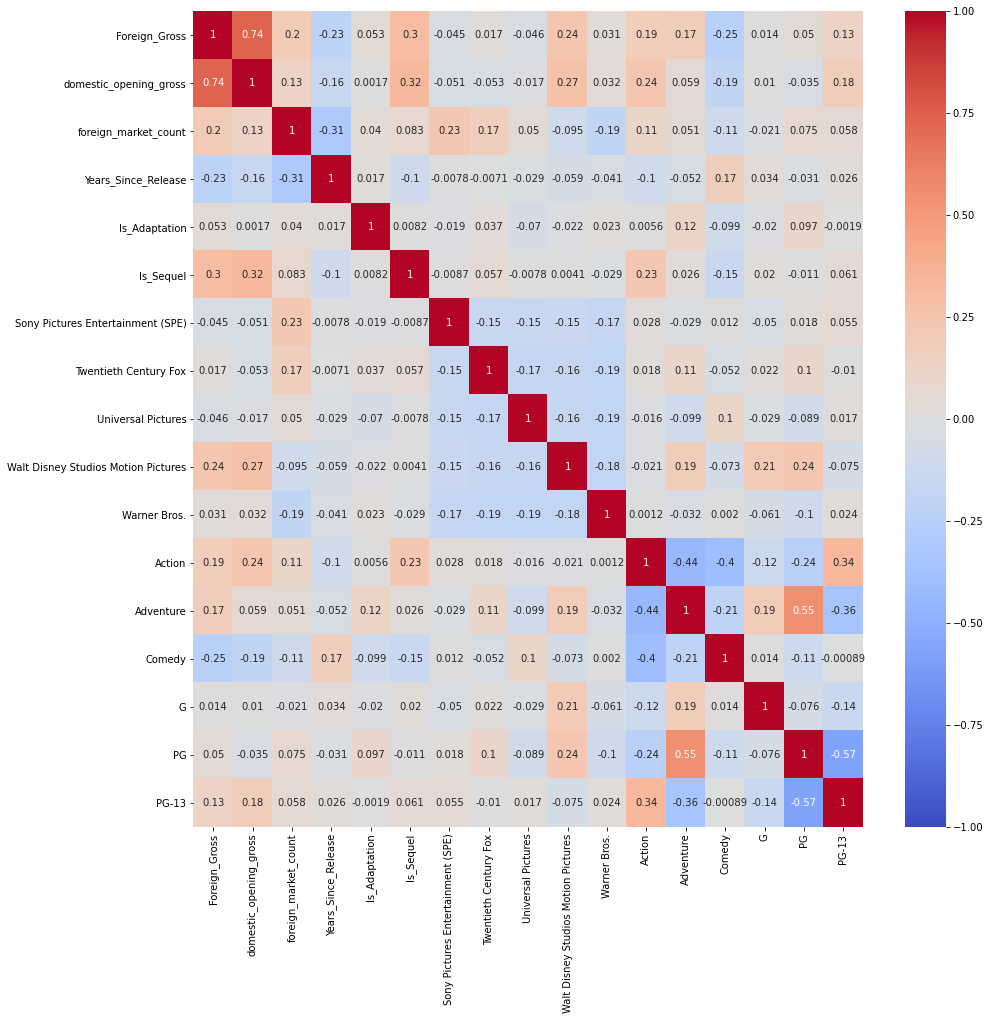

In [92]:
plt.figure(figsize=(15, 15))
sns.heatmap(model_df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm');

### Looking at our data to note any outliers we want to clean before we begin modeling

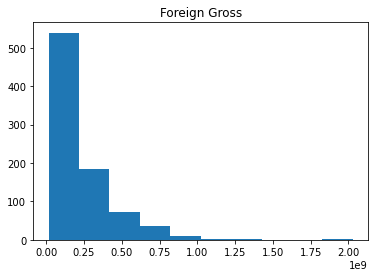

In [114]:
#target variable is not normally distributed

plt.hist(model_df['Foreign_Gross']); plt.title('Foreign Gross');

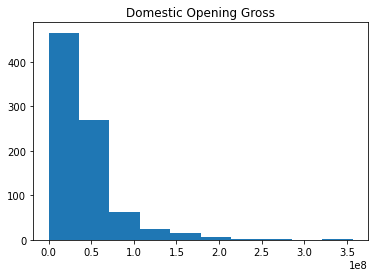

In [117]:
#our main feature is skewed--we may want to get rid of the outliers on the right
plt.hist(model_df['domestic_opening_gross']); plt.title('Domestic Opening Gross');

In [124]:
model_df.sort_values(by = ['domestic_opening_gross'])
#for now we will keep as is the low domestic grosses don't have any other indications of being an outlier.


,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy,G,PG,PG-13
847,205619125,7456,7,7,0,0,0,0,0,0,0,1,0,0,0,0,1
717,85436990,77873,49,11,0,0,0,0,0,0,0,0,0,0,0,0,0
838,29707311,90872,45,7,0,0,0,0,1,0,0,1,0,0,0,0,0
25,416389690,103507,49,9,0,0,0,0,0,0,0,0,0,0,0,0,0
337,88574023,123360,50,4,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1018130819,208806270,66,5,1,1,0,0,1,0,0,1,0,0,0,0,1
549,712358805,220009584,52,3,0,1,0,0,0,1,0,1,0,0,0,0,1
526,1131561811,247966675,62,5,0,1,0,0,0,1,0,1,0,0,0,0,1
241,1369544272,257698183,54,2,0,1,0,0,0,1,0,1,0,0,0,0,1


In [135]:
#let's look at this very low domestic opening and high foreign gross row.
df[847:848]

,id,Title,Domestic_Gross,Foreign_Gross,domestic_opening_gross,rating,foreign_market_count,distributor,director,actor_1,...,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy
847,2017561,Journey to the West,18058,205619125,7456,PG-13,7,Magnolia Pictures,Stephen Chow,Zhang Wen,...,0,0,0,0,0,0,0,1,0,0


In [219]:
#after a quick box office mojo search, I see it's actually an international film.
#this escaped my earlier data cleaning. We will remove this

#model_df= df.drop(index=847)

In [220]:
model_df.sort_values(by = ['Foreign_Gross'])

,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy,G,PG,PG-13
846,15148718,47042215,39,14,0,1,1,0,0,0,0,0,0,1,0,0,1
844,19530702,41516170,19,6,0,0,0,0,1,0,0,1,0,0,0,0,1
841,25380774,31201920,20,3,0,0,0,0,1,0,0,0,1,0,0,0,0
840,27115799,33014202,36,13,0,0,0,0,0,0,0,0,0,1,0,0,1
839,28058591,20854735,29,17,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1131561811,247966675,62,5,0,1,0,0,0,1,0,1,0,0,0,0,1
59,1162041131,147187040,68,5,0,1,0,0,1,0,0,1,0,0,0,0,1
241,1369544272,257698183,54,2,0,1,0,0,0,1,0,1,0,0,0,0,1
176,1939427564,357115007,56,1,0,1,0,0,0,1,0,1,0,0,0,0,1


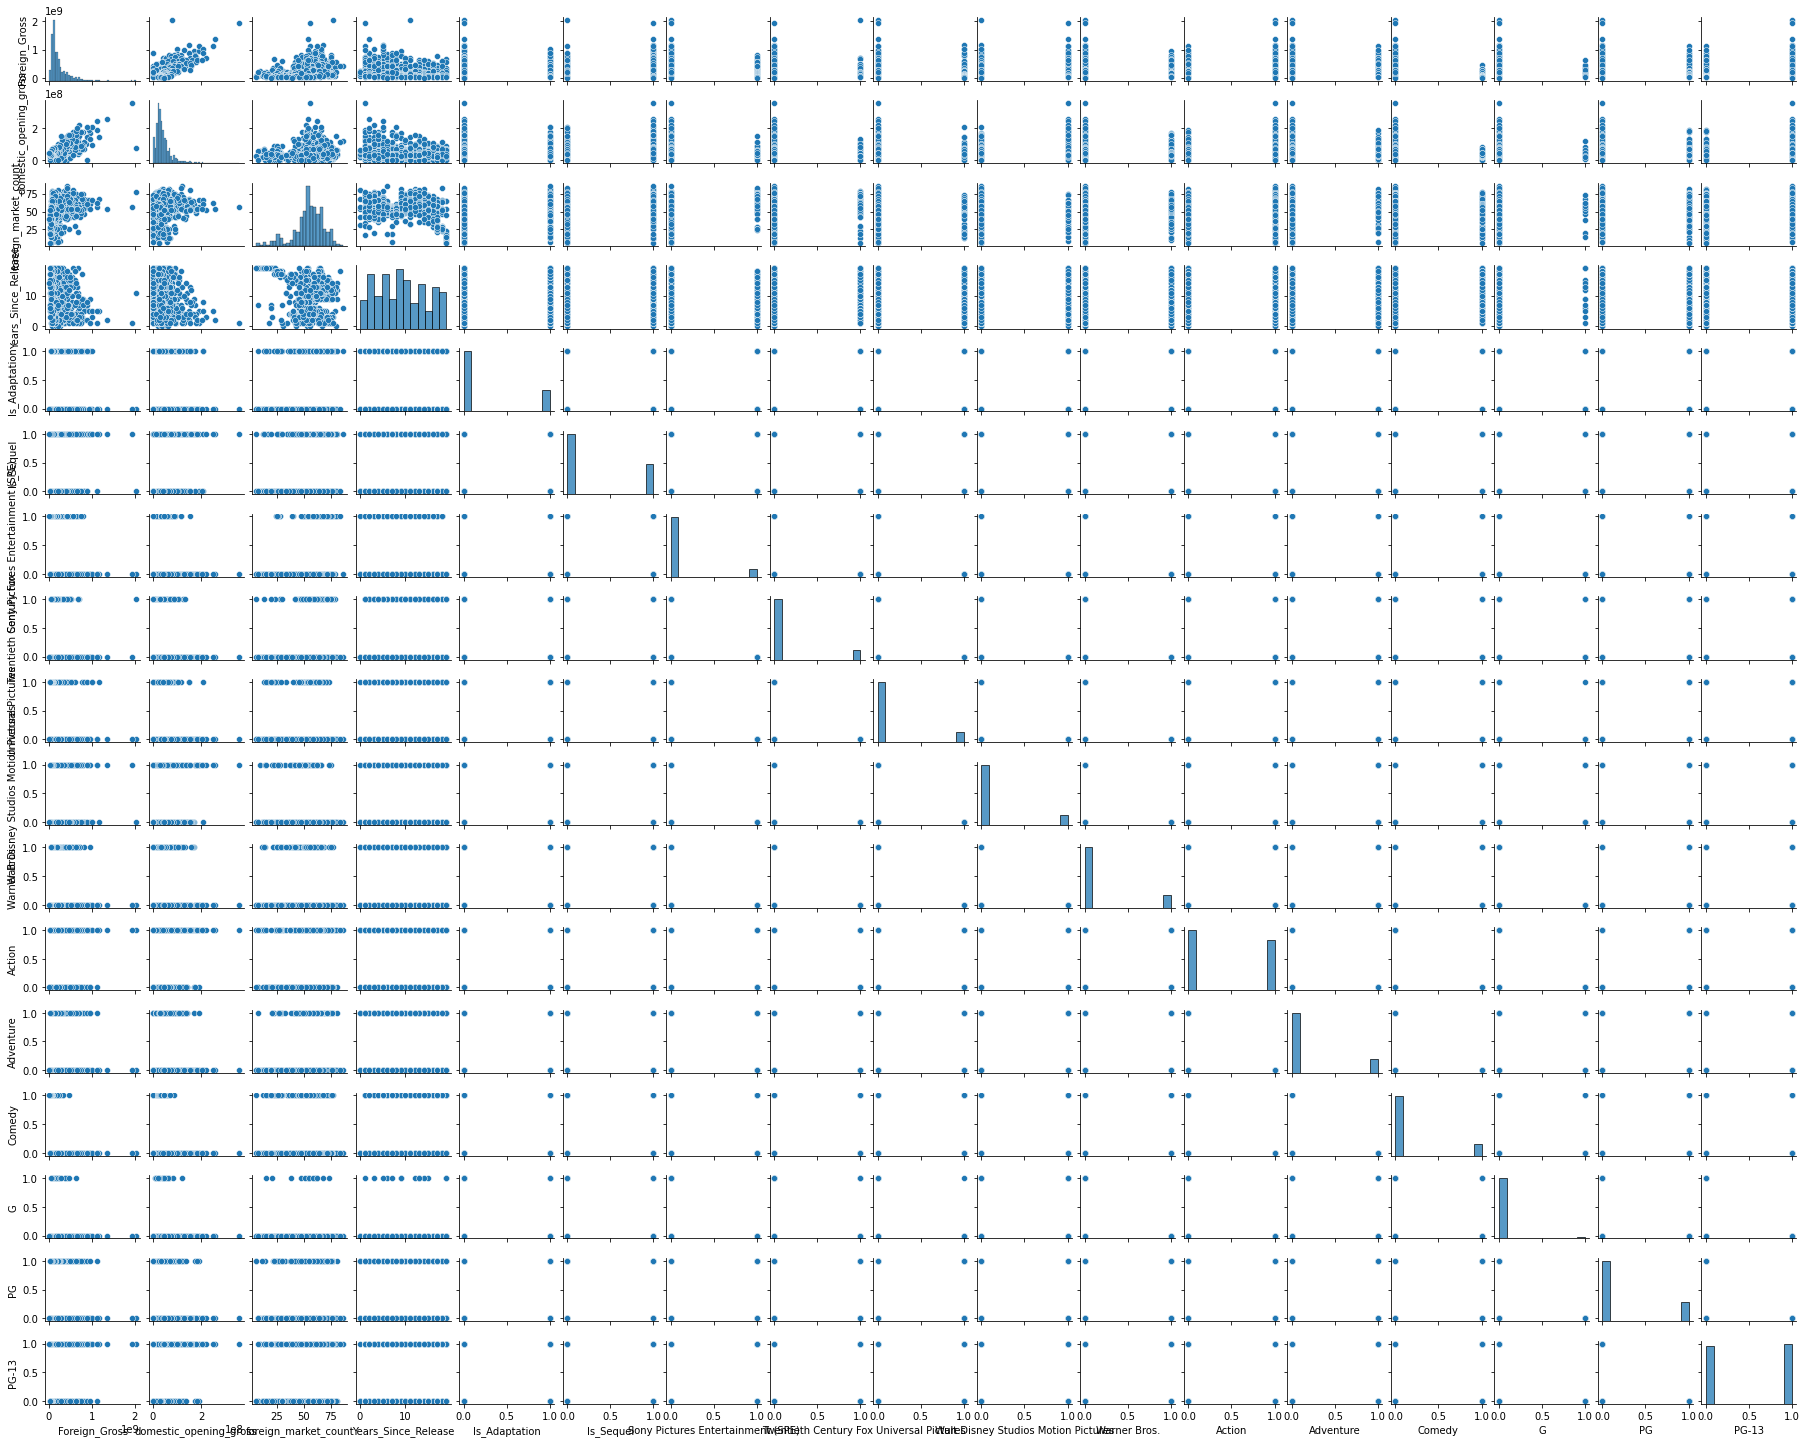

In [113]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(model_df, height=1.2, aspect=1.25);

### Let's Start with Linear Regression

In [221]:
from sklearn.metrics import mean_squared_error
X, y = model_df.drop('Foreign_Gross',axis=1), model_df['Foreign_Gross']
#simple train test validate
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=7)

In [222]:
#set up linear regression
lm = LinearRegression()

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [223]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')
y_predict = lm.predict(X_val)
print(f'Linear Regression MSE: {mean_squared_error(y_val, y_predict):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
y_poly_predict = lm_poly.predict(X_val_poly)
print(f'Degree 2 polynomial regression MSE: {mean_squared_error(y_val, y_predict):.3f}')

Linear Regression val R^2: 0.472
Linear Regression MSE: 17827605300762566.000
Degree 2 polynomial regression val R^2: 0.497
Degree 2 polynomial regression MSE: 17827605300762566.000


In [225]:
#test

lm.fit(X_val,y_val)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')
y_predict_test = lm.predict(X_test)
print(f'Linear Regression MSE: {mean_squared_error(y_val, y_predict):.3f}')

lm_poly.fit(X_val_poly, y_val)
print(f'Degree 2 polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')
y_poly_predict_test = lm_poly.predict(X_test_poly)
print(f'Degree 2 polynomial regression MSE: {mean_squared_error(y_val, y_predict):.3f}')

Linear Regression test R^2: 0.576
Linear Regression MSE: 17827605300762566.000
Degree 2 polynomial regression test R^2: 0.545
Degree 2 polynomial regression MSE: 17827605300762566.000


#### R^2 is much lower for my train than it is for my test, which means that I have outliers in my data. 

### Cleaning Outliers
#### Let's clean out some outliers in the data, focusing on the most correlated x-feature--domestic opening gross and its outliers as plotted earlier in our histogram

In [230]:
#there are still a few rows left that have domestic openings under 6 figures.
#we're trying to predict the foreign gross of blockbuster films, so let's get rid of them so we're only focused on 6-figure+ opening weekends.
model_df.sort_values(by = ['domestic_opening_gross'])

,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy,G,PG,PG-13
717,85436990,77873,49,11,0,0,0,0,0,0,0,0,0,0,0,0,0
838,29707311,90872,45,7,0,0,0,0,1,0,0,1,0,0,0,0,0
25,416389690,103507,49,9,0,0,0,0,0,0,0,0,0,0,0,0,0
337,88574023,123360,50,4,0,0,0,0,0,0,0,0,0,0,0,0,1
20,140699243,136470,20,19,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,1018130819,208806270,66,5,1,1,0,0,1,0,0,1,0,0,0,0,1
549,712358805,220009584,52,3,0,1,0,0,0,1,0,1,0,0,0,0,1
526,1131561811,247966675,62,5,0,1,0,0,0,1,0,1,0,0,0,0,1
241,1369544272,257698183,54,2,0,1,0,0,0,1,0,1,0,0,0,0,1


In [235]:
six_figure_df= model_df.drop(index=[717,838])

In [249]:
X, y = six_figure_df.drop('Foreign_Gross',axis=1), six_figure_df['Foreign_Gross']
#simple train test validate
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=7)

In [237]:
#set up linear regression
lm = LinearRegression()

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [238]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')
y_predict = lm.predict(X_val)
print(f'Linear Regression MSE: {mean_squared_error(y_val, y_predict):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')
y_poly_predict = lm_poly.predict(X_val_poly)
print(f'Degree 2 polynomial regression MSE: {mean_squared_error(y_val, y_predict):.3f}')

Linear Regression val R^2: 0.503
Linear Regression MSE: 16902930022228720.000
Degree 2 polynomial regression val R^2: 0.525
Degree 2 polynomial regression MSE: 16902930022228720.000


#### our R^2 value went up! This method of removing the outliers was indeed effective.

In [239]:
#test

lm.fit(X_val,y_val)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')
y_predict_test = lm.predict(X_test)
print(f'Linear Regression MSE: {mean_squared_error(y_val, y_predict):.3f}')

lm_poly.fit(X_val_poly, y_val)
print(f'Degree 2 polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')
y_poly_predict_test = lm_poly.predict(X_test_poly)
print(f'Degree 2 polynomial regression MSE: {mean_squared_error(y_val, y_predict):.3f}')

Linear Regression test R^2: 0.589
Linear Regression MSE: 16902930022228720.000
Degree 2 polynomial regression test R^2: 0.583
Degree 2 polynomial regression MSE: 16902930022228720.000


In [270]:
six_figure_df.to_pickle('six_figure_df.pickle')

### our test R^2 is still higher, though we have bridged the gap.

In [253]:
six_figure_df['res'] = abs((lm.predict(X)-y))

In [267]:
six_figure_df.sort_values(by = ['res'], ascending = False)
#the highest residual is avatar for instance, a very high grossing film
#but movies like this aren't ones we can get rid of due the fact that we want to input blockbusters (high grossing films) into the model

,Foreign_Gross,domestic_opening_gross,foreign_market_count,Years_Since_Release,Is_Adaptation,Is_Sequel,Sony Pictures Entertainment (SPE),Twentieth Century Fox,Universal Pictures,Walt Disney Studios Motion Pictures,Warner Bros.,Action,Adventure,Comedy,G,PG,PG-13,res
113,2029931467,77025481,77,11,0,0,0,1,0,0,0,1,0,0,0,0,1,1.708088e+09
176,1939427564,357115007,56,1,0,1,0,0,0,1,0,1,0,0,0,0,1,6.446688e+08
188,880065368,243390,56,7,1,0,0,0,0,1,0,0,1,0,0,1,0,6.217064e+08
59,1162041131,147187040,68,5,0,1,0,0,1,0,0,1,0,0,0,0,1,6.054813e+08
16,1009996733,98786705,65,3,0,1,0,0,1,0,0,1,0,0,0,0,1,5.962094e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,115904636,31603106,65,9,0,0,1,0,0,0,0,0,0,1,0,0,0,5.987367e+05
344,113241303,15190758,48,4,0,0,0,0,0,0,0,0,0,0,0,0,0,4.918049e+05
269,153726881,30480153,75,12,0,0,0,1,0,0,0,0,0,0,0,0,1,3.472352e+05
839,28058591,20854735,29,17,0,0,0,0,1,0,0,0,0,0,0,0,1,2.579368e+05


### Cross Validating

#### Let's see how our data does when we cross validate, still sticking to a linear regression

In [278]:
X, y = six_figure_df.drop('Foreign_Gross',axis=1), six_figure_df['Foreign_Gross']
#leave out 20% for testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=7)

In [272]:
from sklearn.model_selection import cross_validate

def cv_results(X, y, model=LinearRegression(normalize=True), scoring='r2', rounding=4, cv=5, minimize_score=False):
    '''
    For a set of features and target X, y, perform a 5 fold cross validation.
    Fit and validate a model, and report results
    Note: `sklearn.model_selection.cross_validate` defaults to 5 fold, 80/20 validation splits.
    '''
    
    model_cv = cross_validate(model, X, y, cv=cv, return_train_score=True, 
                              scoring=scoring, return_estimator=True)

    if minimize_score:
        select = model_cv['test_score'].argmin()
    else:
        select = model_cv['test_score'].argmax()

    final_model = model_cv['estimator'][select]
    
    # Capture the ratio between the train and test scores to understand possible under/over fitting
    model_cv['train_test_score_ratio'] = model_cv['train_score'] / model_cv['test_score']
    
    mean_score = round(model_cv['test_score'].mean(), rounding)
    min_score = round(model_cv['test_score'].min(), rounding)
    max_score = round(model_cv['test_score'].max(), rounding)
    
    mean_ratio = round(model_cv['train_test_score_ratio'].mean(), rounding)
    min_ratio = round(model_cv['train_test_score_ratio'].min(), rounding)
    max_ratio = round(model_cv['train_test_score_ratio'].max(), rounding)
    
    # report results
    print(f'Test {scoring} {":":<15} Mean = {mean_score}\tRange = ({min_score}, {max_score})')
    print(f'Train/Test {scoring} Ratio {":":<3} Mean = {mean_ratio}\tRange = ({min_ratio}, {max_ratio})')
    
    print('\nBest Model Feature coefficient results:')
    for feature, coef in zip(X.columns, final_model.coef_):
        print(f'{feature + ":":<16} {coef:.2f}')

In [279]:
cv_results(X, y)

Test r2 :               Mean = 0.715	Range = (0.5782, 0.8569)
Train/Test r2 Ratio :   Mean = 1.1031	Range = (0.8391, 1.3772)

Best Model Feature coefficient results:
domestic_opening_gross: 3.10
foreign_market_count: 1190261.98
Years_Since_Release: -2008554.67
Is_Adaptation:   12587160.74
Is_Sequel:       28684402.97
Sony Pictures Entertainment (SPE): -7904074.94
Twentieth Century Fox: 15508097.31
Universal Pictures: -14639452.39
Walt Disney Studios Motion Pictures: 53079813.57
Warner Bros.:    34055719.18
Action:          900838.63
Adventure:       46714395.38
Comedy:          -17233248.59
G:               -55467068.58
PG:              -3574394.85
PG-13:           6722244.67
res:             0.73


In [94]:
from sklearn.model_selection import KFold

X, y = model_df.drop('Foreign_Gross',axis=1), model_df['Foreign_Gross']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [112]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics 

#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 7)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    ridge = Ridge(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
#print(f'Simple MSE:{np.sqrt(metrics.mean_squared_error(y_train,y_val))}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.5760967734570286, 0.510244559937985, 0.5152676727549474, 0.7321624003881102, 0.5443092487036967]
Ridge scores:  [0.5762177960625116, 0.5100176362840263, 0.5158074655454385, 0.732206886028418, 0.5445976696662496] 

Simple mean cv r^2: 0.576 +- 0.082


ValueError: Found input variables with inconsistent numbers of samples: [543, 135]

In [ ]:
#my ridge and simple regression scores are exactly the same. hmmm.

In [109]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 7)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    Lasso = Lasso(alpha=1)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

TypeError: 'Lasso' object is not callable

In [103]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([0.65564555, 0.61527195, 0.42252862, 0.57178831, 0.68291648])

In [106]:
kf = KFold(n_splits=5, shuffle=True, random_state = 7)
cross_val_score(ridge, X, y, cv=kf, scoring='r2')

/Users/juliaqiao/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.71619e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/juliaqiao/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.73857e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/juliaqiao/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.47482e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/juliaqiao/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.13479e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/juliaqiao/opt/anaconda3/envs/metis/lib/python3.8/

array([0.57662179, 0.5106844 , 0.5158966 , 0.73244739, 0.54552876])

In [107]:
kf = KFold(n_splits=5, shuffle=True, random_state = 1000)

print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(ridge, X, y, cv=kf, scoring='r2')))

0.5533134942135968
0.5536897226643634


/Users/juliaqiao/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.46895e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/juliaqiao/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.67145e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/juliaqiao/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.05358e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/juliaqiao/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.27042e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Users/juliaqiao/opt/anaconda3/envs/metis/lib/python3.8/

In [ ]:
#from sklearn import metrics
#metrics.mean_absolute_error(y_test, y)